In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm as LN
from astropy.table import Table,vstack,unique
from glob import glob
from makeic import makeLSMC
import pynbody as pb

In [2]:
flist = glob('gatables14/t*')
flist.sort()
t1 = Table()
for file in flist:
    t = Table.read(file,format='ascii')
    t1 = vstack([t1,t])
t1.sort(['fit','run'])
t1['mass'] = t1['mass']*1.83e11/2.12e10
t1

run,r,d,v,beta,delta,gamma,theta,phi,mass,xdist,vdist,fit,distfit,mapfit,pmmlfit,pmmbfit,rvfit
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
19752.0,53.546156310049646,39.1920818801925,37.01984320142991,101.1565471052829,87.70703555920615,300.0080772257035,159.93450273045474,68.22593445943488,9.422081436046977,1.1526832841263424,22.239543450762845,0.02926530055753639,495.9259716518728,0.07042948593529677,3465.5958453652183,3032.68249655523,622.7098791498265
19858.0,53.79749323416195,39.02418961133231,36.88846737195902,100.95881117798825,87.47130597343248,300.19879233935745,156.9167147246811,60.745274129770536,7.052018526981034,2.1611603017907473,20.95672176757486,0.03233308438843254,443.8548010935822,0.07762949115511379,7457.017766460291,3378.741096357175,312.6917604727536
19818.0,53.70189133975229,39.124735096626026,37.0590595627123,100.46754249426273,87.59521775827923,300.04657709489226,171.8923921117173,340.89604343414896,7.147300209519487,1.903199532416711,20.7107468905691,0.033246985727872526,432.55720522540884,0.07475894889154006,7079.236193898718,3154.084898562641,226.25538863897933
19905.0,53.75205021165109,39.24961280425544,37.00521043448372,100.99051441510858,88.28178813108654,300.14540877534847,173.9877785539956,24.20219464737206,8.90407445579068,0.9402494570496,20.116241995457813,0.035508755963040366,405.5472610613026,0.06892617167714779,3634.8062601431466,3288.1714234726596,612.9762814786985
19937.0,53.720764921722676,39.22925217117577,36.7943231915136,100.5157036493228,87.79080284606198,300.07611821071544,127.78094612389123,160.7521969867968,9.121838725175154,1.271660050106936,19.94089080091625,0.03564347842203251,399.2562452171043,0.0885990328967186,4956.050752270004,3686.70719100272,798.0017055461591
19813.0,53.571024765611604,39.24341427746849,36.81726836875341,100.91299571400133,88.00568463728334,300.13092093034413,149.6562871352897,285.33756616614096,10.305506269202738,0.7847582700768149,19.867206623634015,0.03631117204134524,395.3217445686212,0.06482117518410603,3790.87476360477,3192.0514495534812,782.014466425374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19882.0,53.700260828820284,39.12634100881194,36.83910443915817,100.81507580351133,87.70807091919656,300.11794138154636,176.2358575831914,213.91370321988185,8.632075471698114,1.1265994842405804,1.5305459226571614,0.7644486120743236,3.611797219253603,0.06907971662635583,4560.036684374554,3100.960247306162,346.9880480960445
19897.0,53.700260828820284,39.12634100881194,36.83910443915817,100.81507580351133,87.70807091919656,300.11794138154636,176.2358575831914,213.91370321988185,8.632075471698114,1.1238804374268607,1.3985178782215728,0.7725938660563813,3.2189594933361616,0.06881156479872605,4608.86435958397,3172.5687529358415,359.2796795999353


In [3]:
t2 = unique(t1,keys=['r','d','v','beta','delta','theta','phi'],keep='last')
t2.sort('mapfit')
#t2.reverse()
t3 = t2[:20]
t2

run,r,d,v,beta,delta,gamma,theta,phi,mass,xdist,vdist,fit,distfit,mapfit,pmmlfit,pmmbfit,rvfit
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
19709.0,53.78354575474504,39.108551888252684,36.77861364027206,100.76168982995208,87.6646561908497,300.1371082978713,156.4111824154008,10.512646091086708,8.537592273463439,0.9685259357532036,18.568909710052626,0.04150355224914955,345.7424503083133,0.05572683168215126,4709.768898343863,2364.450309709686,534.7577509830786
19826.0,53.8444158104003,39.20990743194996,36.98342522949455,100.78097720123473,87.53240058014406,300.29809052750085,156.62323493927278,330.8139525583098,7.278158227138769,1.9384974373676314,15.698958140972026,0.05634335770918428,250.21505902667275,0.05800609099027625,5018.275713177172,2622.365014187337,467.77576410551654
19900.0,53.53280957993426,39.06999061549285,36.592925913361306,100.89899765327932,87.44366790247022,300.2430084574677,160.82028816983598,356.0004885718773,8.244705472058355,1.135218225743514,16.11352934748949,0.05431796610445861,260.9345484524653,0.060154734288812135,4811.606108862498,2374.64191200145,394.94327101487784
19712.0,53.518449181983655,39.19570543871902,36.63559607131605,100.68437085115941,87.66321941430941,300.0475461971208,153.71634368016382,28.012452558040195,9.03881603642346,0.8734577516880087,17.2347547006968,0.0478006865226771,297.7996980371743,0.06091362216413486,5593.799152426375,2485.142272649968,352.5619040230115
19916.0,53.66955666184668,39.1038504334677,36.81611767763861,100.99014517074313,87.5912488509809,300.0746282436741,140.76255803381719,306.84792858738433,9.000197151092209,0.7391885496844356,15.47431426149412,0.05825687767906801,240.00080157546486,0.061275153582131925,5806.7180751256465,2654.5442705184387,508.42635459184226
19768.0,53.69354965200949,39.242787604057554,36.833701030433296,100.73822908434985,87.68753212045513,299.9348516680779,160.7505113604435,294.39307364088904,9.378385562639295,0.3971178376439711,14.833711004244988,0.06343356992257976,220.19668473443386,0.06228258585388988,4275.89625187138,2884.3129821508737,547.0524478791056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19827.0,53.72455480079242,39.039719115384656,36.85988766727521,100.86544361468204,87.69439627301159,300.0625740318579,140.95117351657532,133.09956090476678,7.8609956192076424,1.7712423521453746,11.623280051935552,0.0949808705485696,138.2379386357564,0.08582718602780977,4173.632525976503,3005.479545104079,781.073133053038
19899.0,53.527112699705455,39.141318142444966,36.78514642726535,100.63865821562291,87.60339299317316,300.0857000162974,137.11836384233308,110.06049841810643,8.931575560116361,1.4730430641071193,11.46720845389626,0.09776348531993596,133.66672559382394,0.08604896723242064,4162.794690612067,2915.8111173302873,804.6846213797343


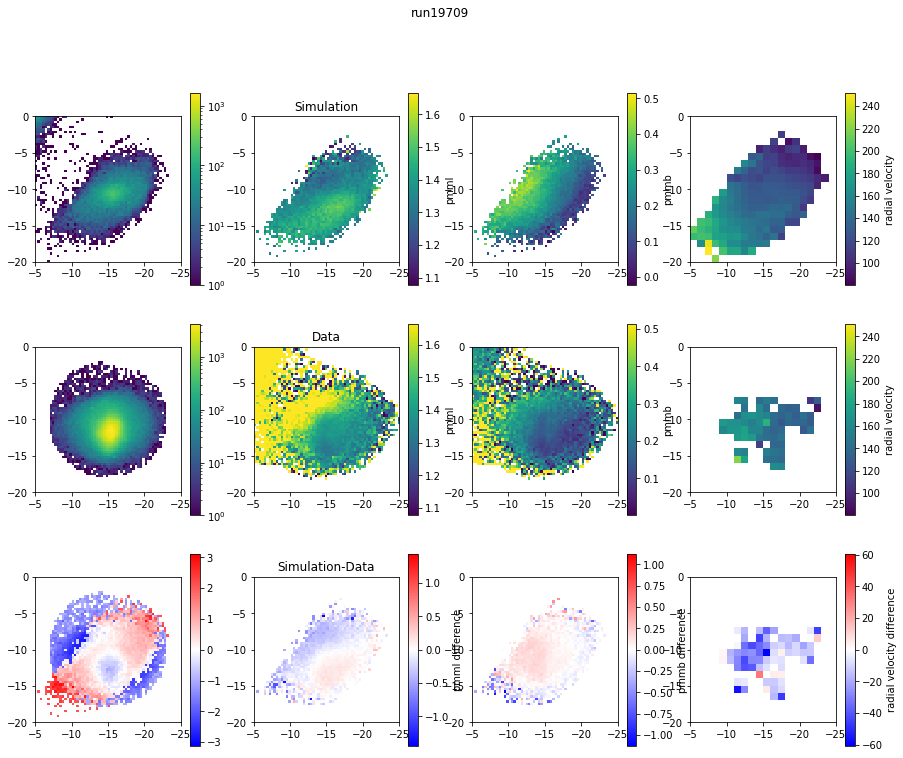

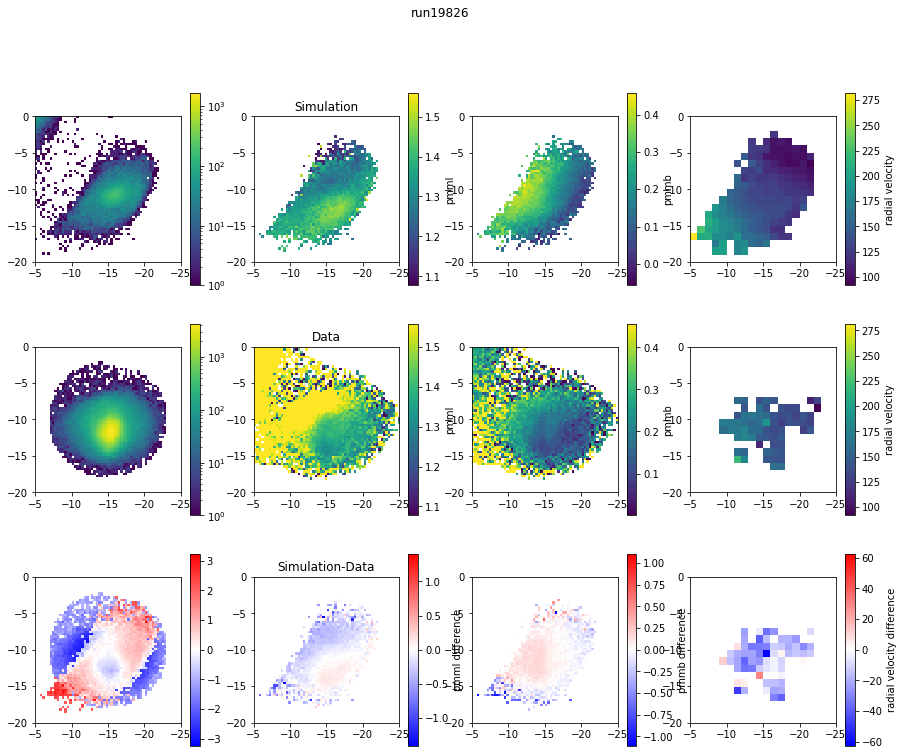

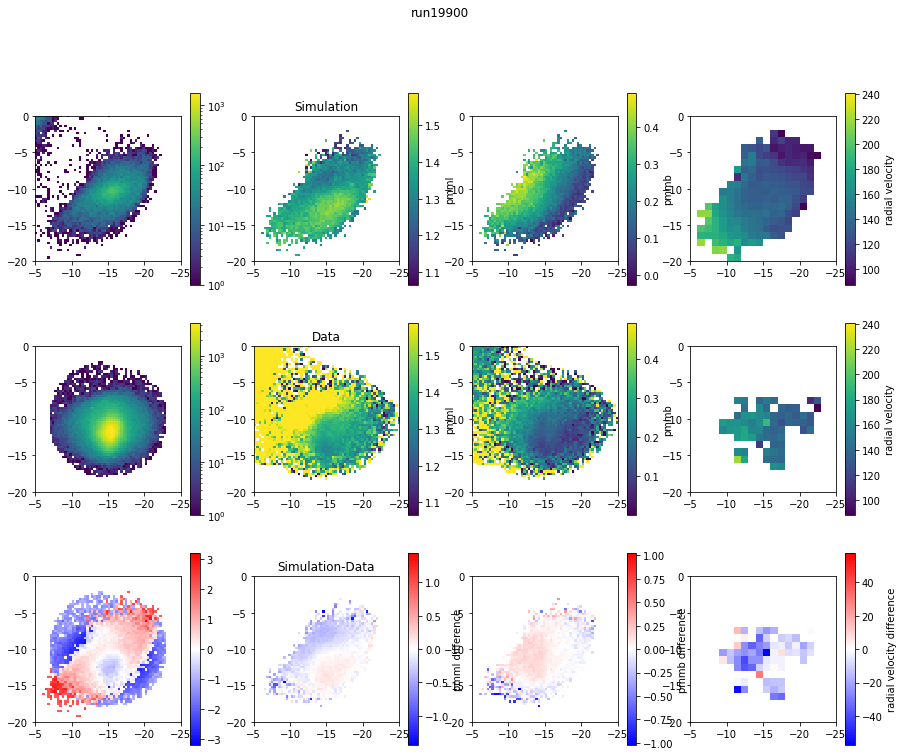

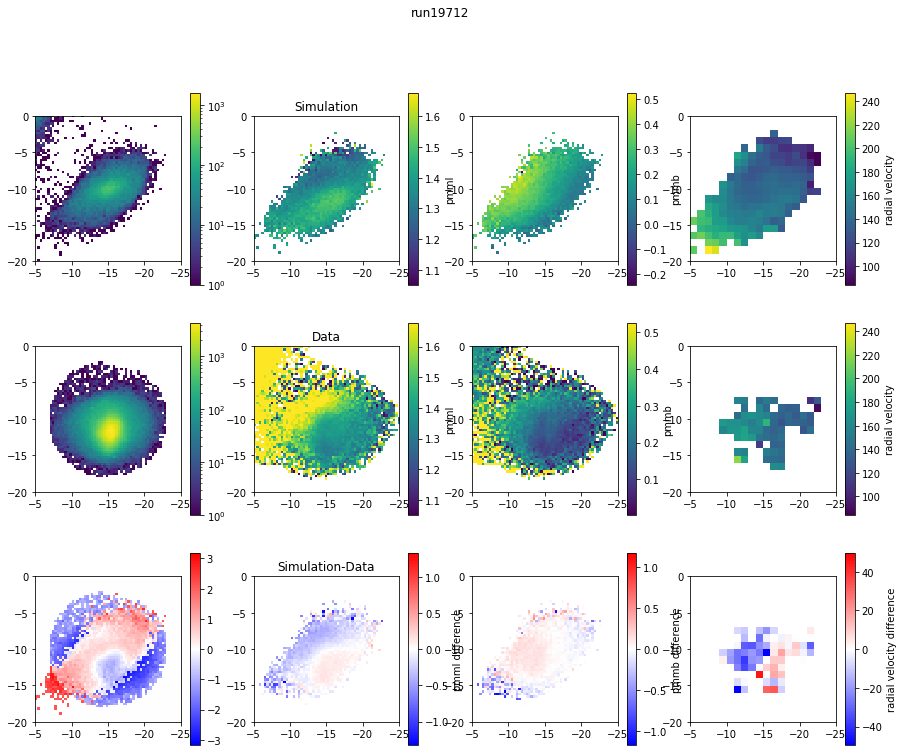

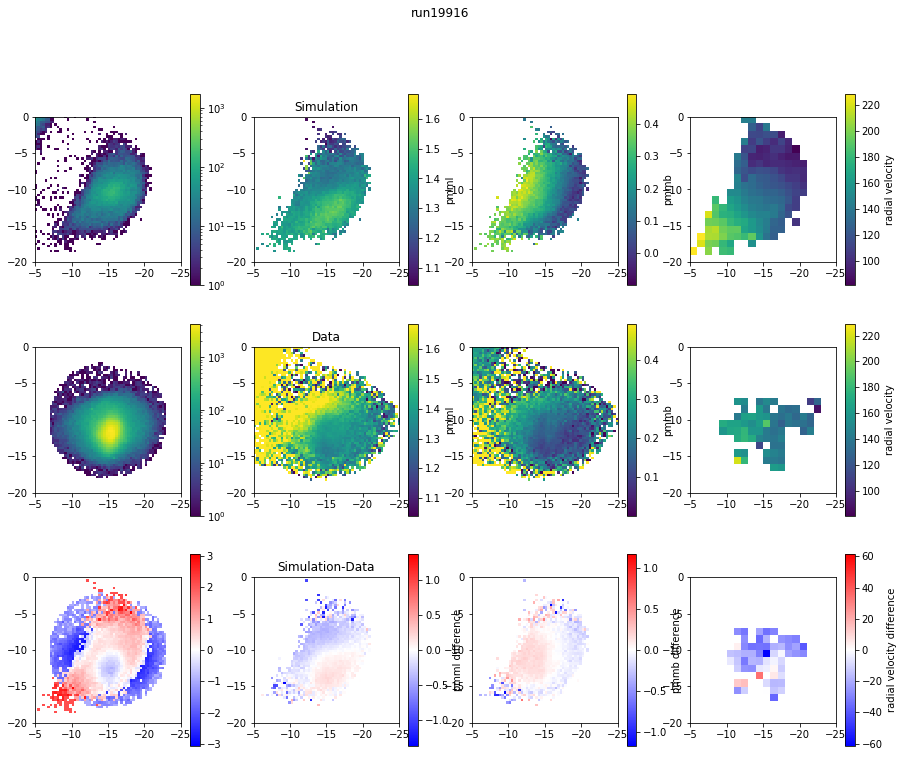

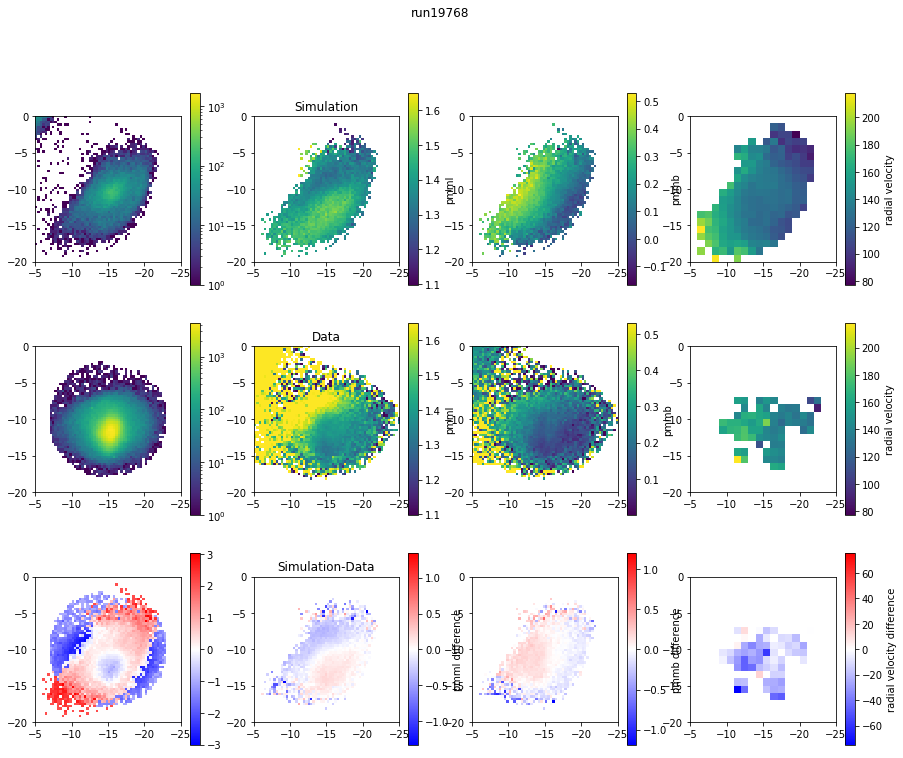

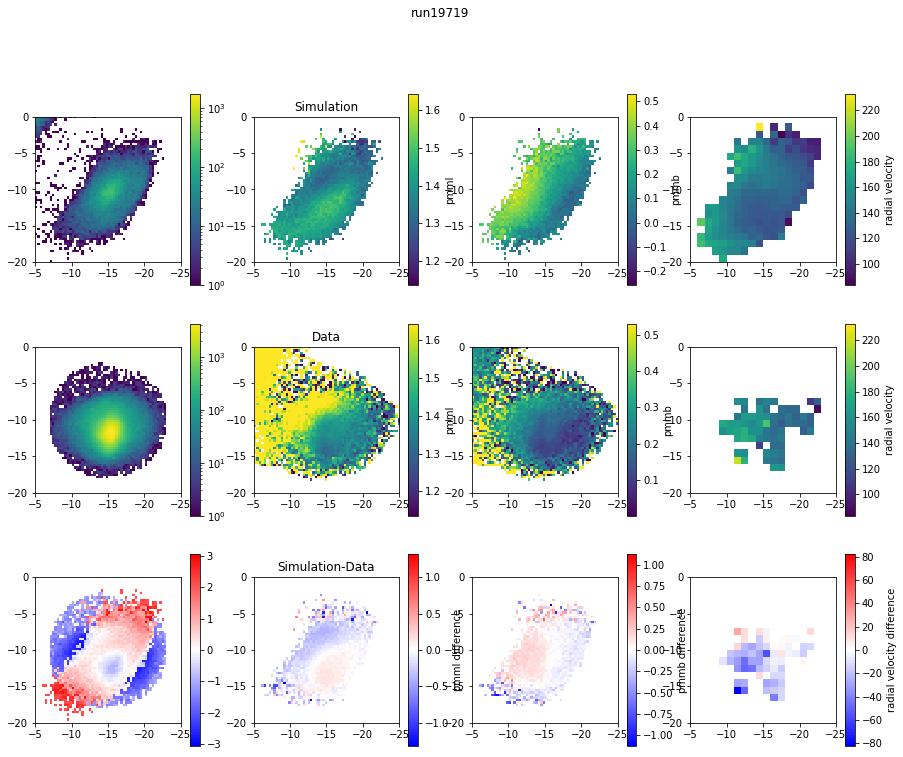

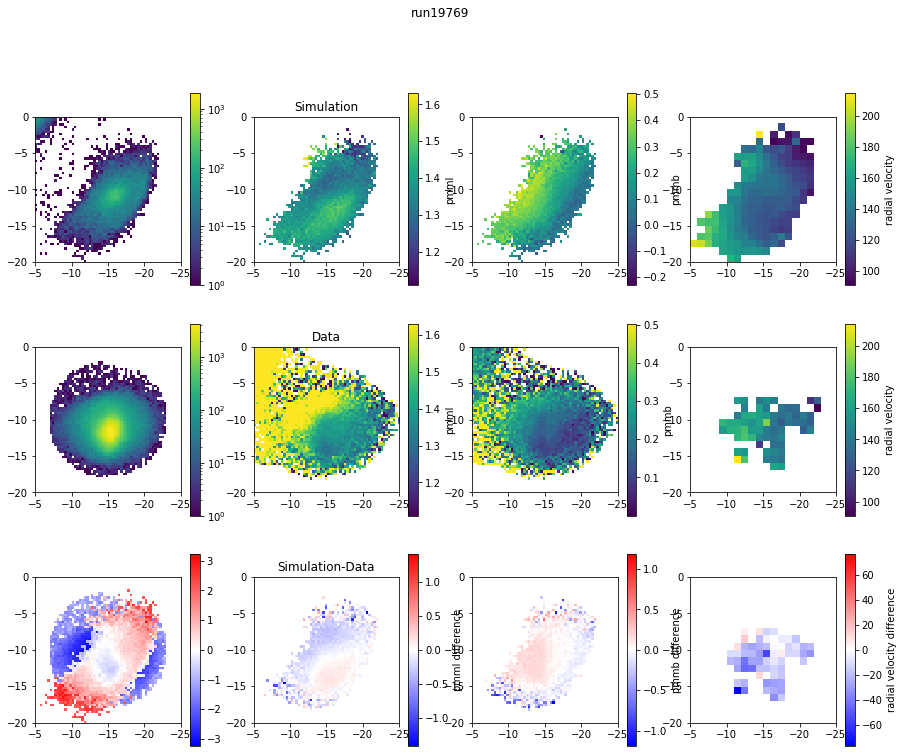

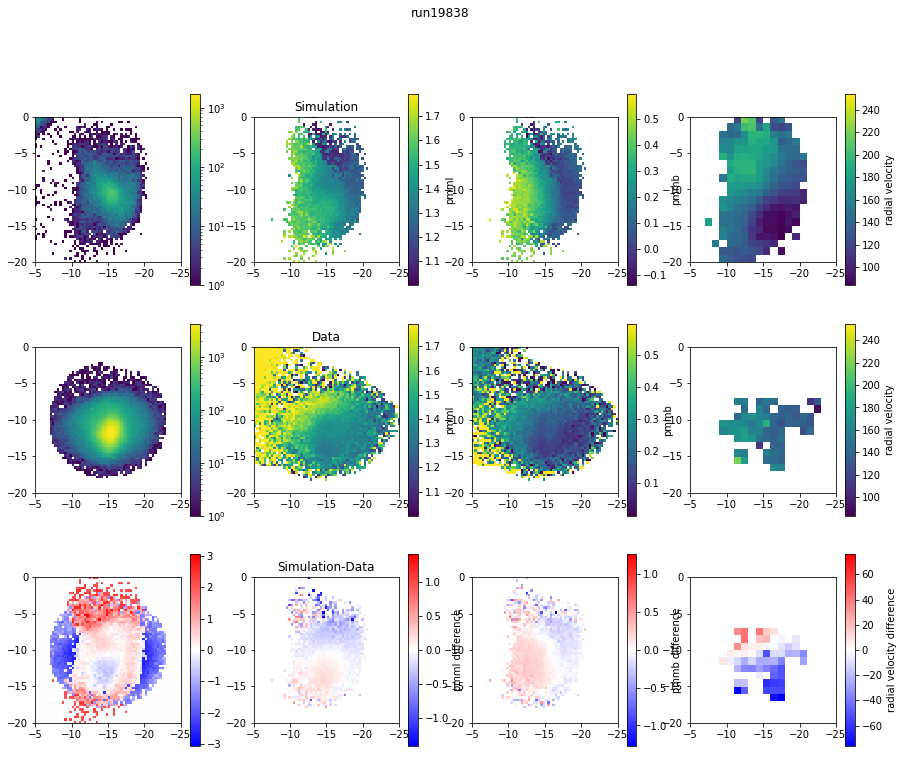

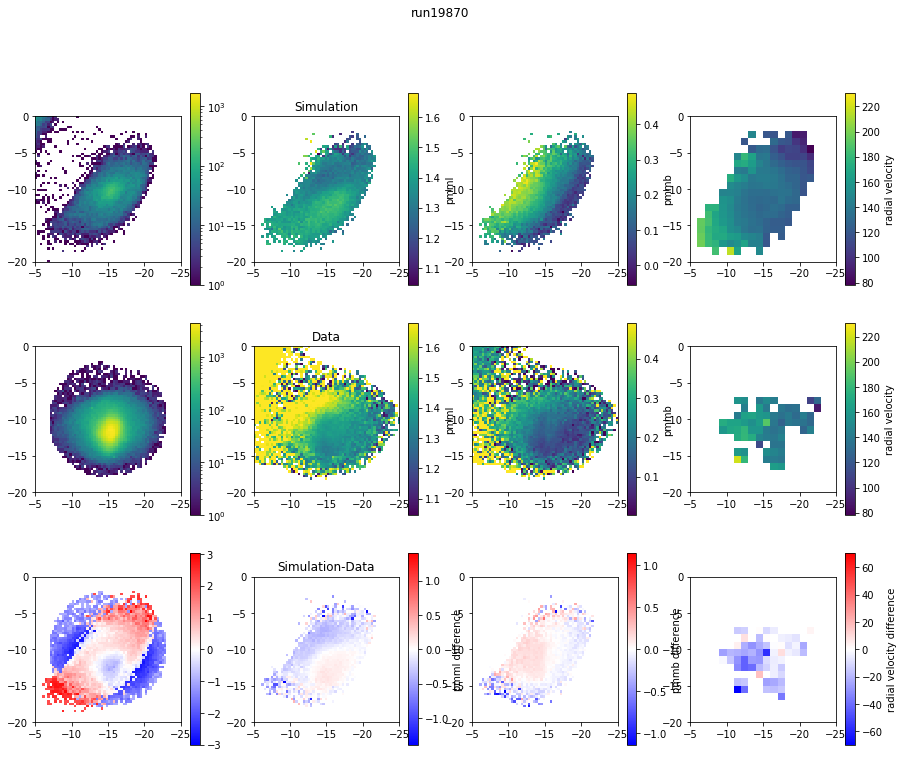

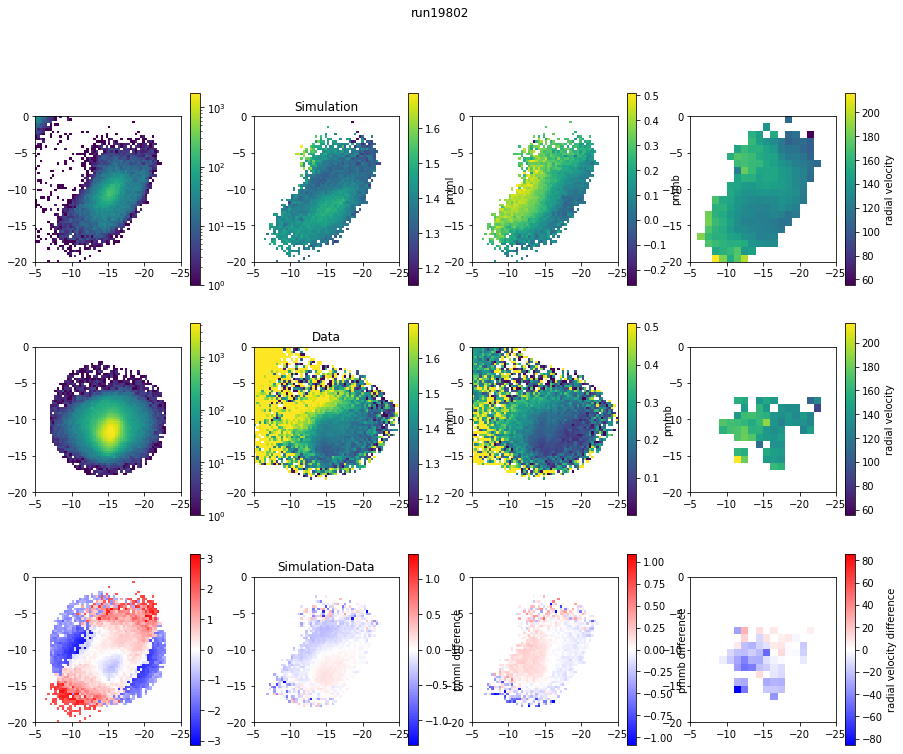

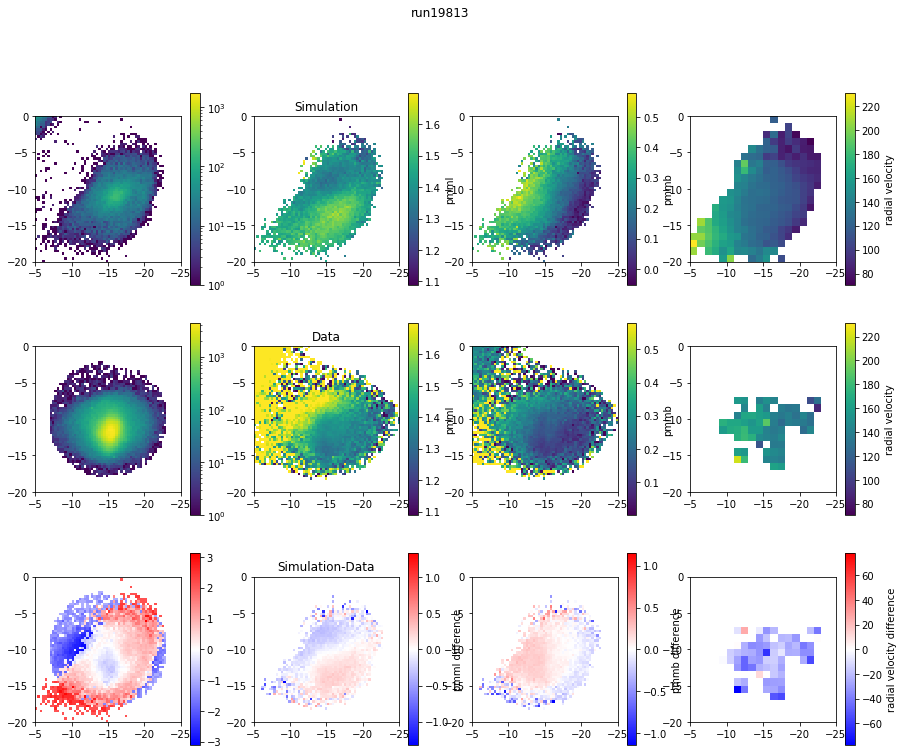

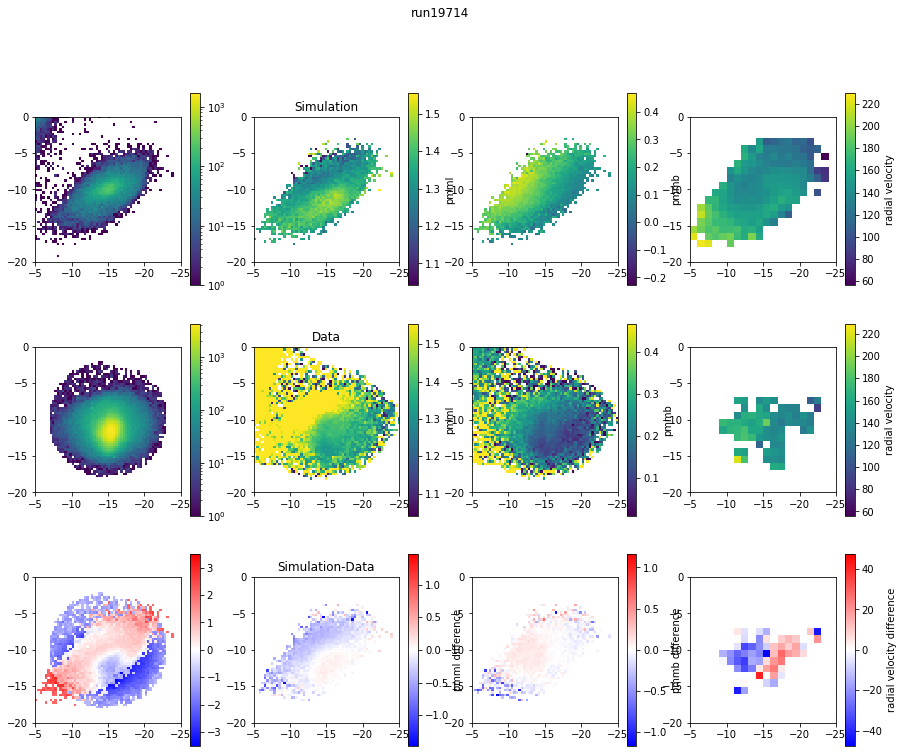

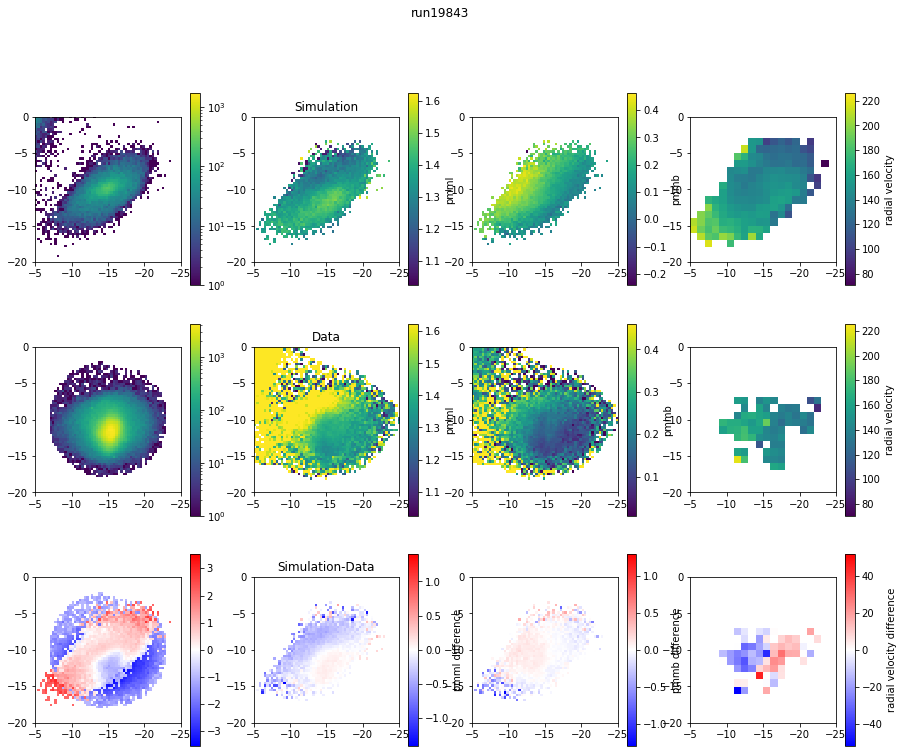

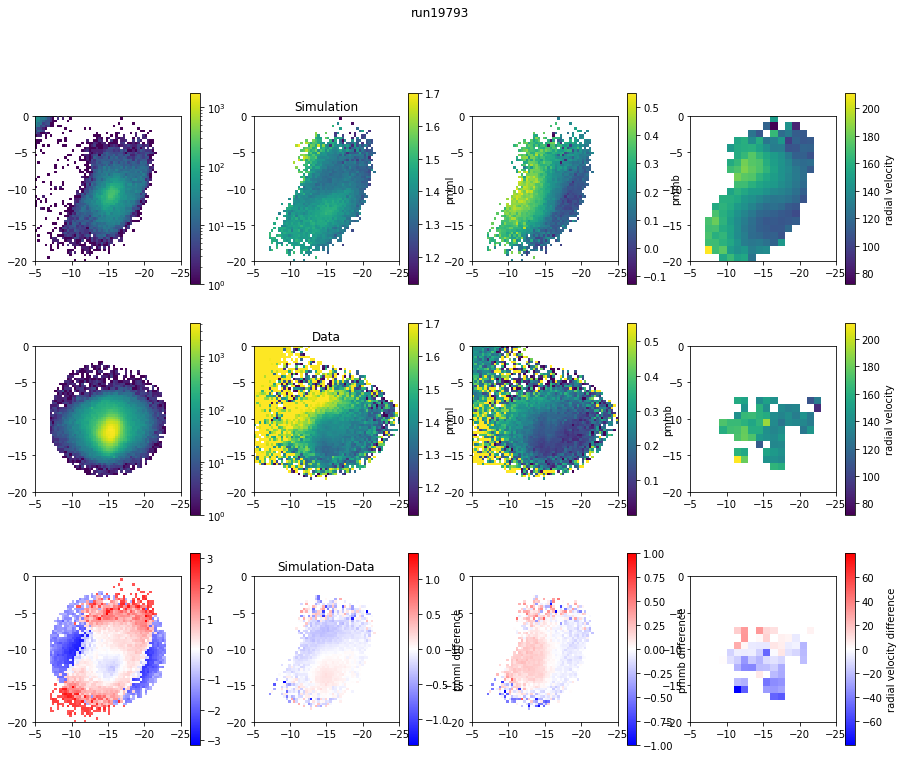

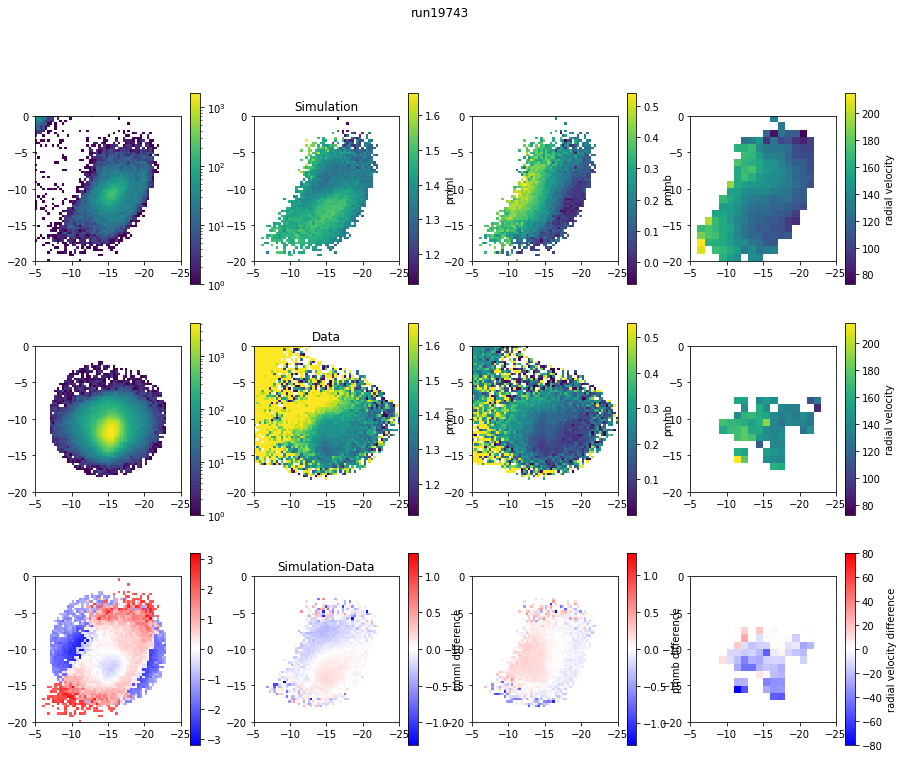

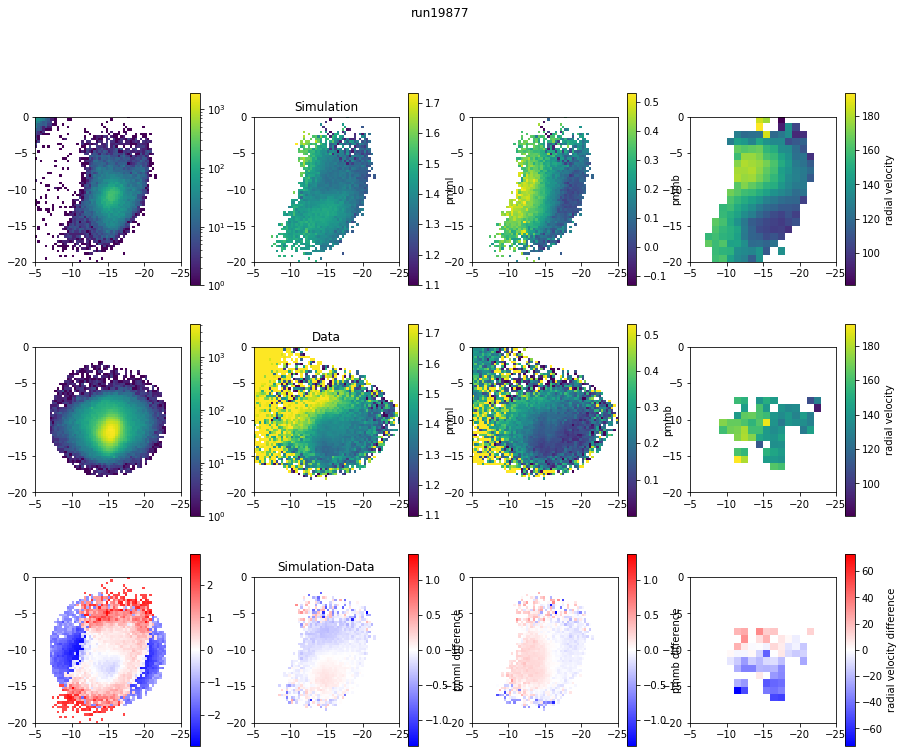

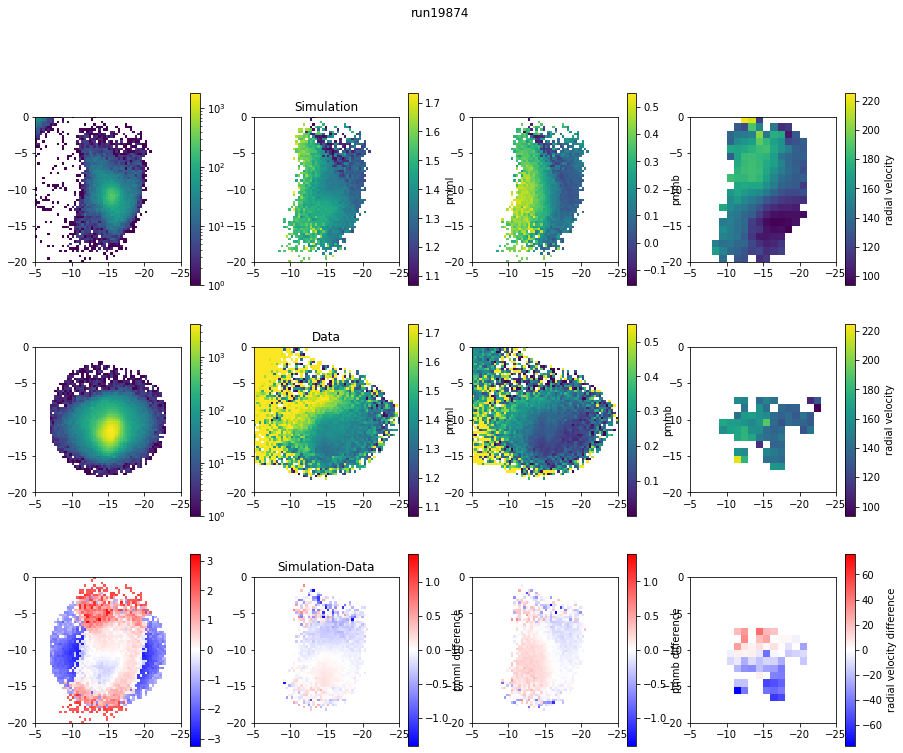

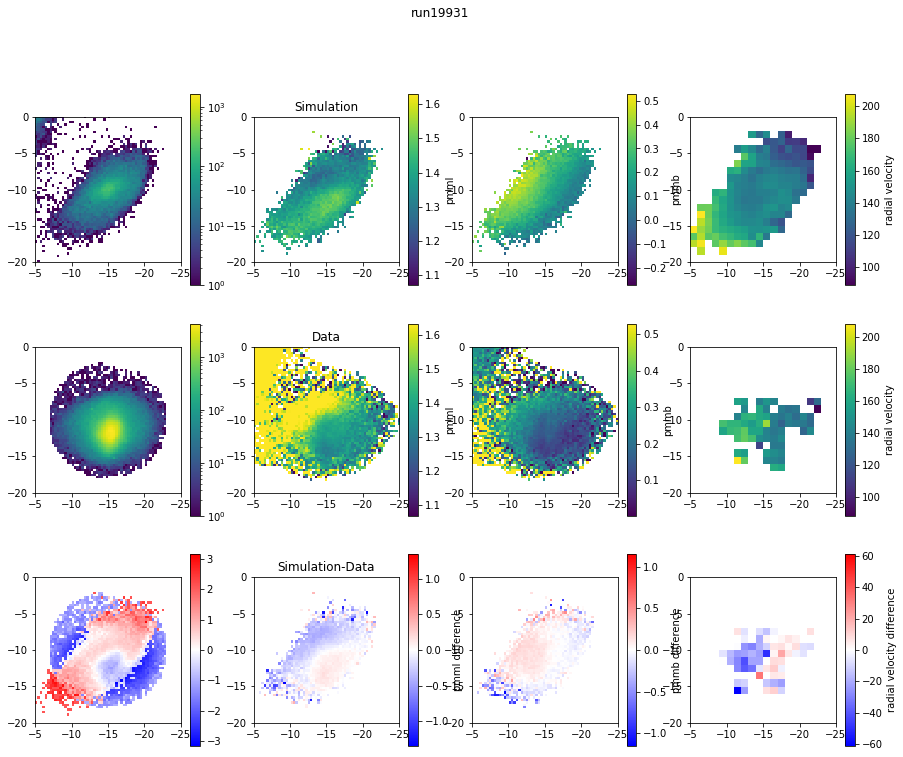

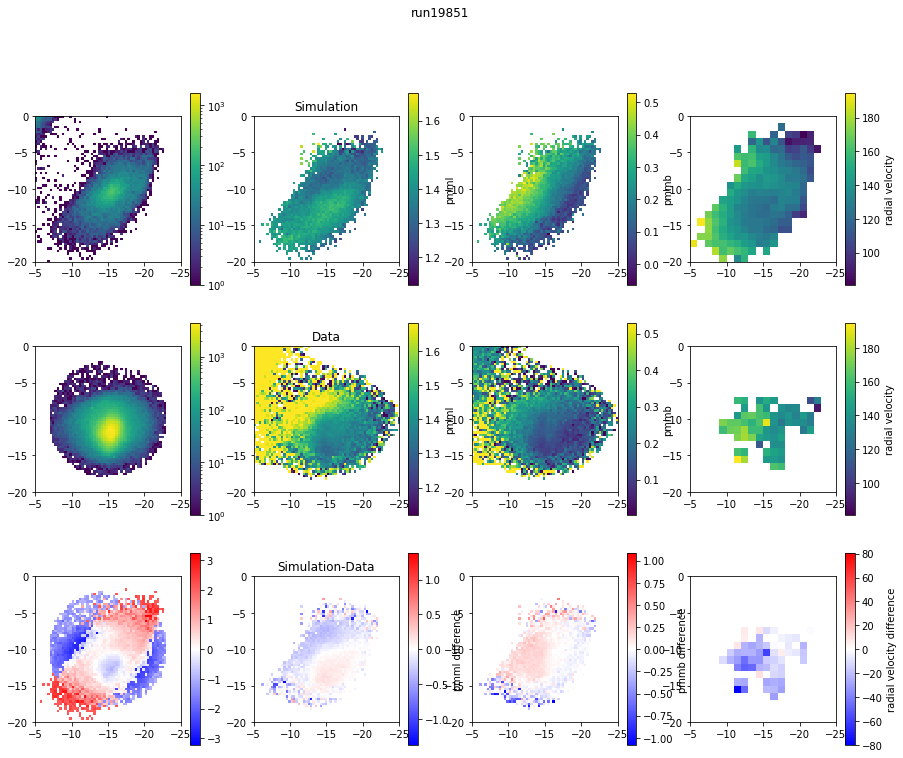

In [4]:
extent = [-30,30,-30,30]
for line in t3:
    im1 = np.load('imfiles5/run{}a.npy'.format(int(line['run'])))
    im4 = np.load('imfiles5/run{}w.npy'.format(int(line['run'])))
    plt.figure(figsize=(15,12))
    plt.subplot(3,4,1)
    plt.imshow(im1.T,origin='lower',extent=extent,norm=LN(),interpolation='none')
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar()
    plt.subplot(3,4,2)
    im2 = np.load('imfiles5/run{}pmml.npy'.format(int(line['run'])))
    vminl = np.min(np.abs(im2[np.where(~np.isnan(im2))]))
    vmaxl = np.max(np.abs(im2[np.where(~np.isnan(im2))]))
    plt.imshow(im2.T,origin='lower',extent=extent,interpolation='none')
    plt.title('Simulation')
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='pmml')
    plt.subplot(3,4,3)
    im3 = np.load('imfiles5/run{}pmmb.npy'.format(int(line['run'])))
    vminb = np.min(np.abs(im3[np.where(~np.isnan(im3))]))
    vmaxb = np.max(np.abs(im3[np.where(~np.isnan(im3))]))
    plt.imshow(im3.T,origin='lower',extent=extent,interpolation='none')
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='pmmb')
    plt.subplot(3,4,4)
    im8 = np.load('imfiles5/run{}rv.npy'.format(int(line['run'])))
    vminrv = np.min(np.abs(im8[np.where(~np.isnan(im8))]))
    vmaxrv = np.max(np.abs(im8[np.where(~np.isnan(im8))]))
    plt.imshow(im8.T,origin='lower',extent=extent,interpolation='none')
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='radial velocity')
    plt.subplot(3,4,9)
    g1 = np.load('gaiamapsmc.npy')
    im5 = np.log10(im4)-np.log10(g1)
    vv1 = np.max(np.abs(im5))
    plt.imshow(im5.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv1,vmax=vv1)
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar()
    plt.subplot(3,4,10)
    g2 = np.load('gaiapmml.npy'.format(int(line['run'])))
    im6 = im2-g2
    vv2 = np.max(np.abs(im6[np.where(~np.isnan(im6))]))
    plt.imshow(im6.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv2,vmax=vv2)
    plt.title('Simulation-Data')
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='pmml difference')
    plt.subplot(3,4,11)
    g3 = np.load('gaiapmmb.npy'.format(int(line['run'])))
    im7 = im3-g3
    vv3 = np.max(np.abs(im7[np.where(~np.isnan(im7))]))
    plt.imshow(im7.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv3,vmax=vv3)
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='pmmb difference')
    plt.subplot(3,4,12)
    d1 = np.load('datarv.npy'.format(int(line['run'])))
    im9 = im8-d1
    vv3 = np.max(np.abs(im9[np.where(~np.isnan(im9))]))
    plt.imshow(im9.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv3,vmax=vv3)
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='radial velocity difference')
    plt.subplot(3,4,5)
    g1[(np.where(g1==0.1))] = 0
    plt.imshow(g1.T,origin='lower',extent=extent,interpolation='none',norm=LN())
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar()
    plt.subplot(3,4,6)
    plt.imshow(g2.T,origin='lower',extent=extent,interpolation='none',vmin=vminl,vmax=vmaxl)
    plt.title('Data')
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='pmml')
    plt.subplot(3,4,7)
    plt.imshow(g3.T,origin='lower',extent=extent,interpolation='none',vmin=vminb,vmax=vmaxb)
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='pmmb')
    plt.subplot(3,4,8)
    plt.imshow(d1.T,origin='lower',extent=extent,interpolation='none',vmin=vminrv,vmax=vmaxrv)
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='radial velocity')
    plt.suptitle('run{}'.format(int(line['run'])))